In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join
%matplotlib inline

In [47]:
from PRmm.extras import activityPlots
from PRmm.model import Fixture


fx = Fixture.fromIniFile(
    "/home/UNIXHOME/dalexander/Projects/Bugs/30959-BadSequence/fixtures.ini",
    "T2B-3.0.16")


fxPoC =  Fixture.fromIniFile(
    "/home/UNIXHOME/dalexander/Projects/Bugs/30959-BadSequence/fixtures.ini",
    "PoC")

badHns = [ 68092830, 12583580, 10945183, 10945437,
           11141780, 11207329, 11600300, 12518051 ]


holeNumbersWithoutAlignments = sorted(set.difference(set(fx.holeNumbers),
                                                     set(fx.alnF.holeNumber)))

In [ ]:
activityPlots.plotMetrics(fx[68092830])

In [ ]:
activityPlots.plotMetrics(fx[12583580])

In [ ]:
activityPlots.plotMetrics(fx[10945183])

In [ ]:
%debug

In [ ]:
activityPlots.plotMetrics(fx[badHns[3]])

In [ ]:
activityPlots.plotMetrics(fx[badHns[4]])

In [ ]:
activityPlots.plotMetrics(fx[badHns[5]])

In [ ]:
fx.basF[badHns[5]].numEvents

In [ ]:
fx.basF[badHns[5]].hqRegion

In [ ]:
(4096/80)*45*1.5

In [ ]:
badHns[5]

In [ ]:
activityPlots.plotMetrics(fx[badHns[6]])

In [ ]:
badHns[6]

In [ ]:
activityPlots.plotMetrics(fx[badHns[7]])

In [ ]:
from ipywidgets import *
#from IPython.display import display



def plotMetricsP(hnString):
    hn = int(hnString)
    activityPlots.plotMetrics(fx[hn])

#hnW = Select(options=map(str, fx.holeNumbersWithAlignments))
hnW = Select(options=map(str, holeNumbersWithoutAlignments))


interact(plotMetricsP, hnString=hnW)

In [ ]:
activityPlots.plotMetrics(fx[10944696])

In [43]:
rt = fx.basF.parts[0].regionTable
rtPoc = fxPoC.basF.parts

S =  set(holeNumbersWithoutAlignments)
hqrfScrewups = [ hqr.holeNumber for hqr in rt[rt.regionType == 2] 
       if (hqr.holeNumber in S and (hqr.regionEnd - hqr.regionStart > 10000)) ]


In [45]:
hqrfScrewups

[11207568,
 11338405,
 11404178,
 11469486,
 11534775,
 11666065,
 11666089,
 11731372,
 11862440,
 11862453,
 11993994,
 12124345,
 12124845,
 12255438,
 12255903,
 12518036,
 12583098,
 12583580,
 12649374,
 12714162,
 12714407,
 12714652,
 12779940,
 12780441,
 12845713,
 12910783,
 13108096,
 13238932,
 13304708,
 13369551,
 13500618,
 13697943,
 13828530,
 13959825,
 14024885,
 14025624,
 14090677,
 14156222,
 14156694,
 14221497,
 14221728,
 14352570,
 14352571,
 14352828,
 14353049,
 14483637,
 14549435,
 14745807,
 14746024,
 14746046,
 14746507,
 14942882,
 14943108,
 14943111,
 28639673,
 28705692,
 28902042,
 28967589,
 29032648,
 29098908,
 29163948,
 29360799,
 29557649,
 29622696,
 29622709,
 29819308,
 29950608,
 30081230,
 30343853,
 31129805,
 31457723,
 31458201,
 31588532,
 31588536,
 31654552,
 31916940,
 32112817,
 32178364,
 32309905,
 32375206,
 32572309,
 32702648,
 32702653,
 46400398,
 46400400,
 46465681,
 46662548,
 46793367,
 46859149,
 47055527,
 47776644,

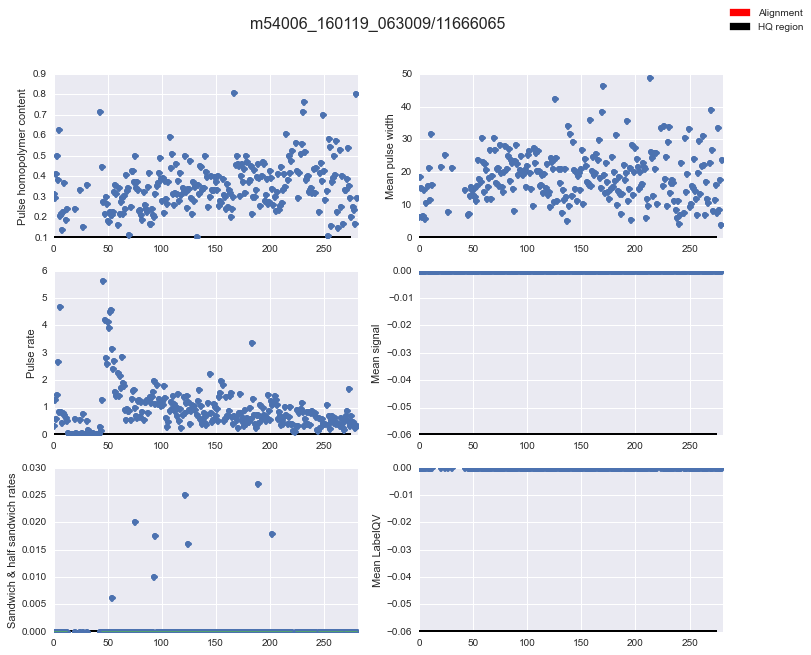

In [56]:
activityPlots.plotMetrics(fx[hqrfScrewups[5]])

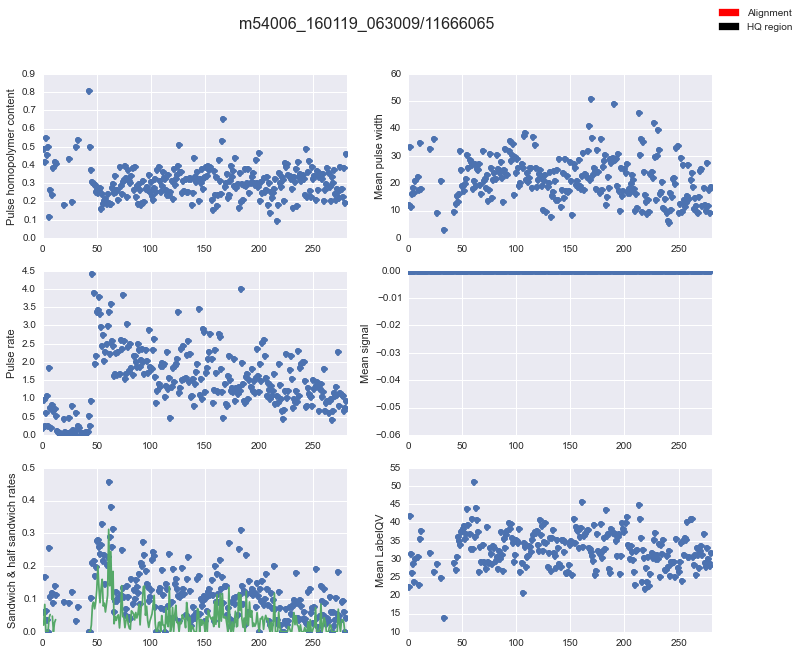

In [57]:
activityPlots.plotMetrics(fxPoC[hqrfScrewups[5]])

In [72]:
def joinedRegionTable(basF):
    x=np.hstack([p.regionTable for p in basF.parts])
    return x.view(np.recarray)


rtPoC = joinedRegionTable(fxPoC.basF)
hqPoC = { r.holeNumber:r for r in rtPoC if r.regionType==2 }

# HQRF screwups, as compared to PoC

hqrfScrewups = [ hqr.holeNumber for hqr in rt[rt.regionType == 2] 
       if (hqr.holeNumber in S and 
           (hqr.regionEnd - hqr.regionStart > 10000) and
           (hqPoC[hqr.holeNumber].regionEnd - hqPoC[hqr.holeNumber].regionStart) < 5000)]



In [74]:
len(hqrfScrewups)

513

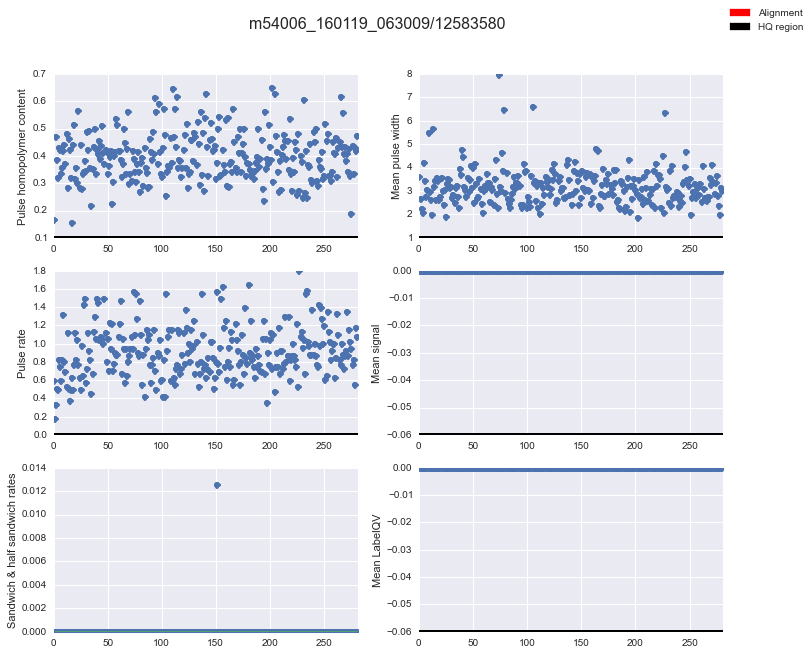

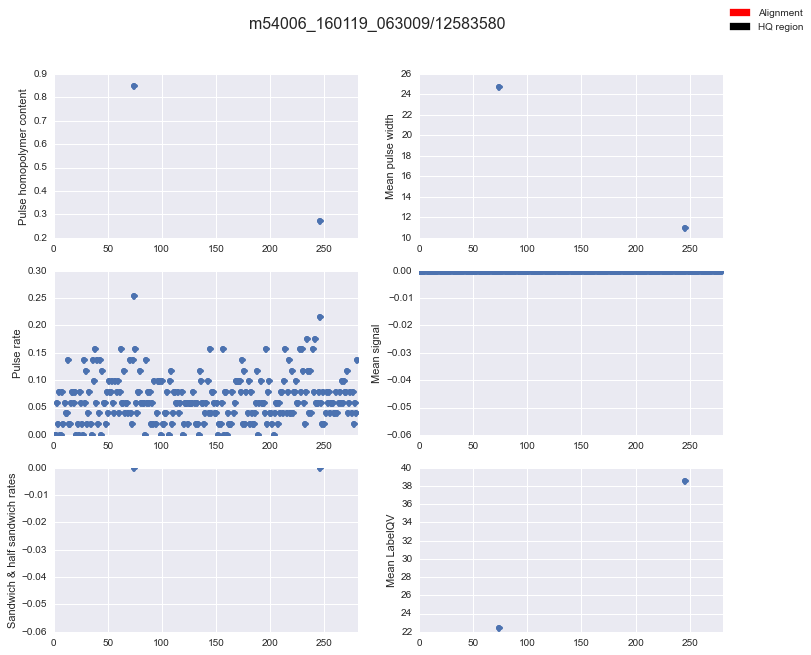

In [91]:
hn = hqrfScrewups[6]
activityPlots.plotMetrics(fx[hn])
activityPlots.plotMetrics(fxPoC[hn])

In [89]:
z=fx[hn]

In [92]:
fx.basF[hn].hqRegionSnr

array([  5.87805223e+00,   3.24313807e+00,   4.60002227e+04,
         2.63678861e+00], dtype=float32)